## Import Libraries/Dataset



In [1]:
import pandas as pd
!pip install opendatasets
import opendatasets as od

# Download the dataset from Kaggle
od.download("https://www.kaggle.com/muthuj7/weather-dataset?select=weatherHistory.csv")

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("weather-dataset/weatherHistory.csv")

Defaulting to user installation because normal site-packages is not writeable
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hijverma
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 2.23M/2.23M [00:03<00:00, 683kB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Data Visualization and Exploration

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
print("The Shape of the data is:",df.shape)
df.describe()

The Shape of the data is: (96453, 12)


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


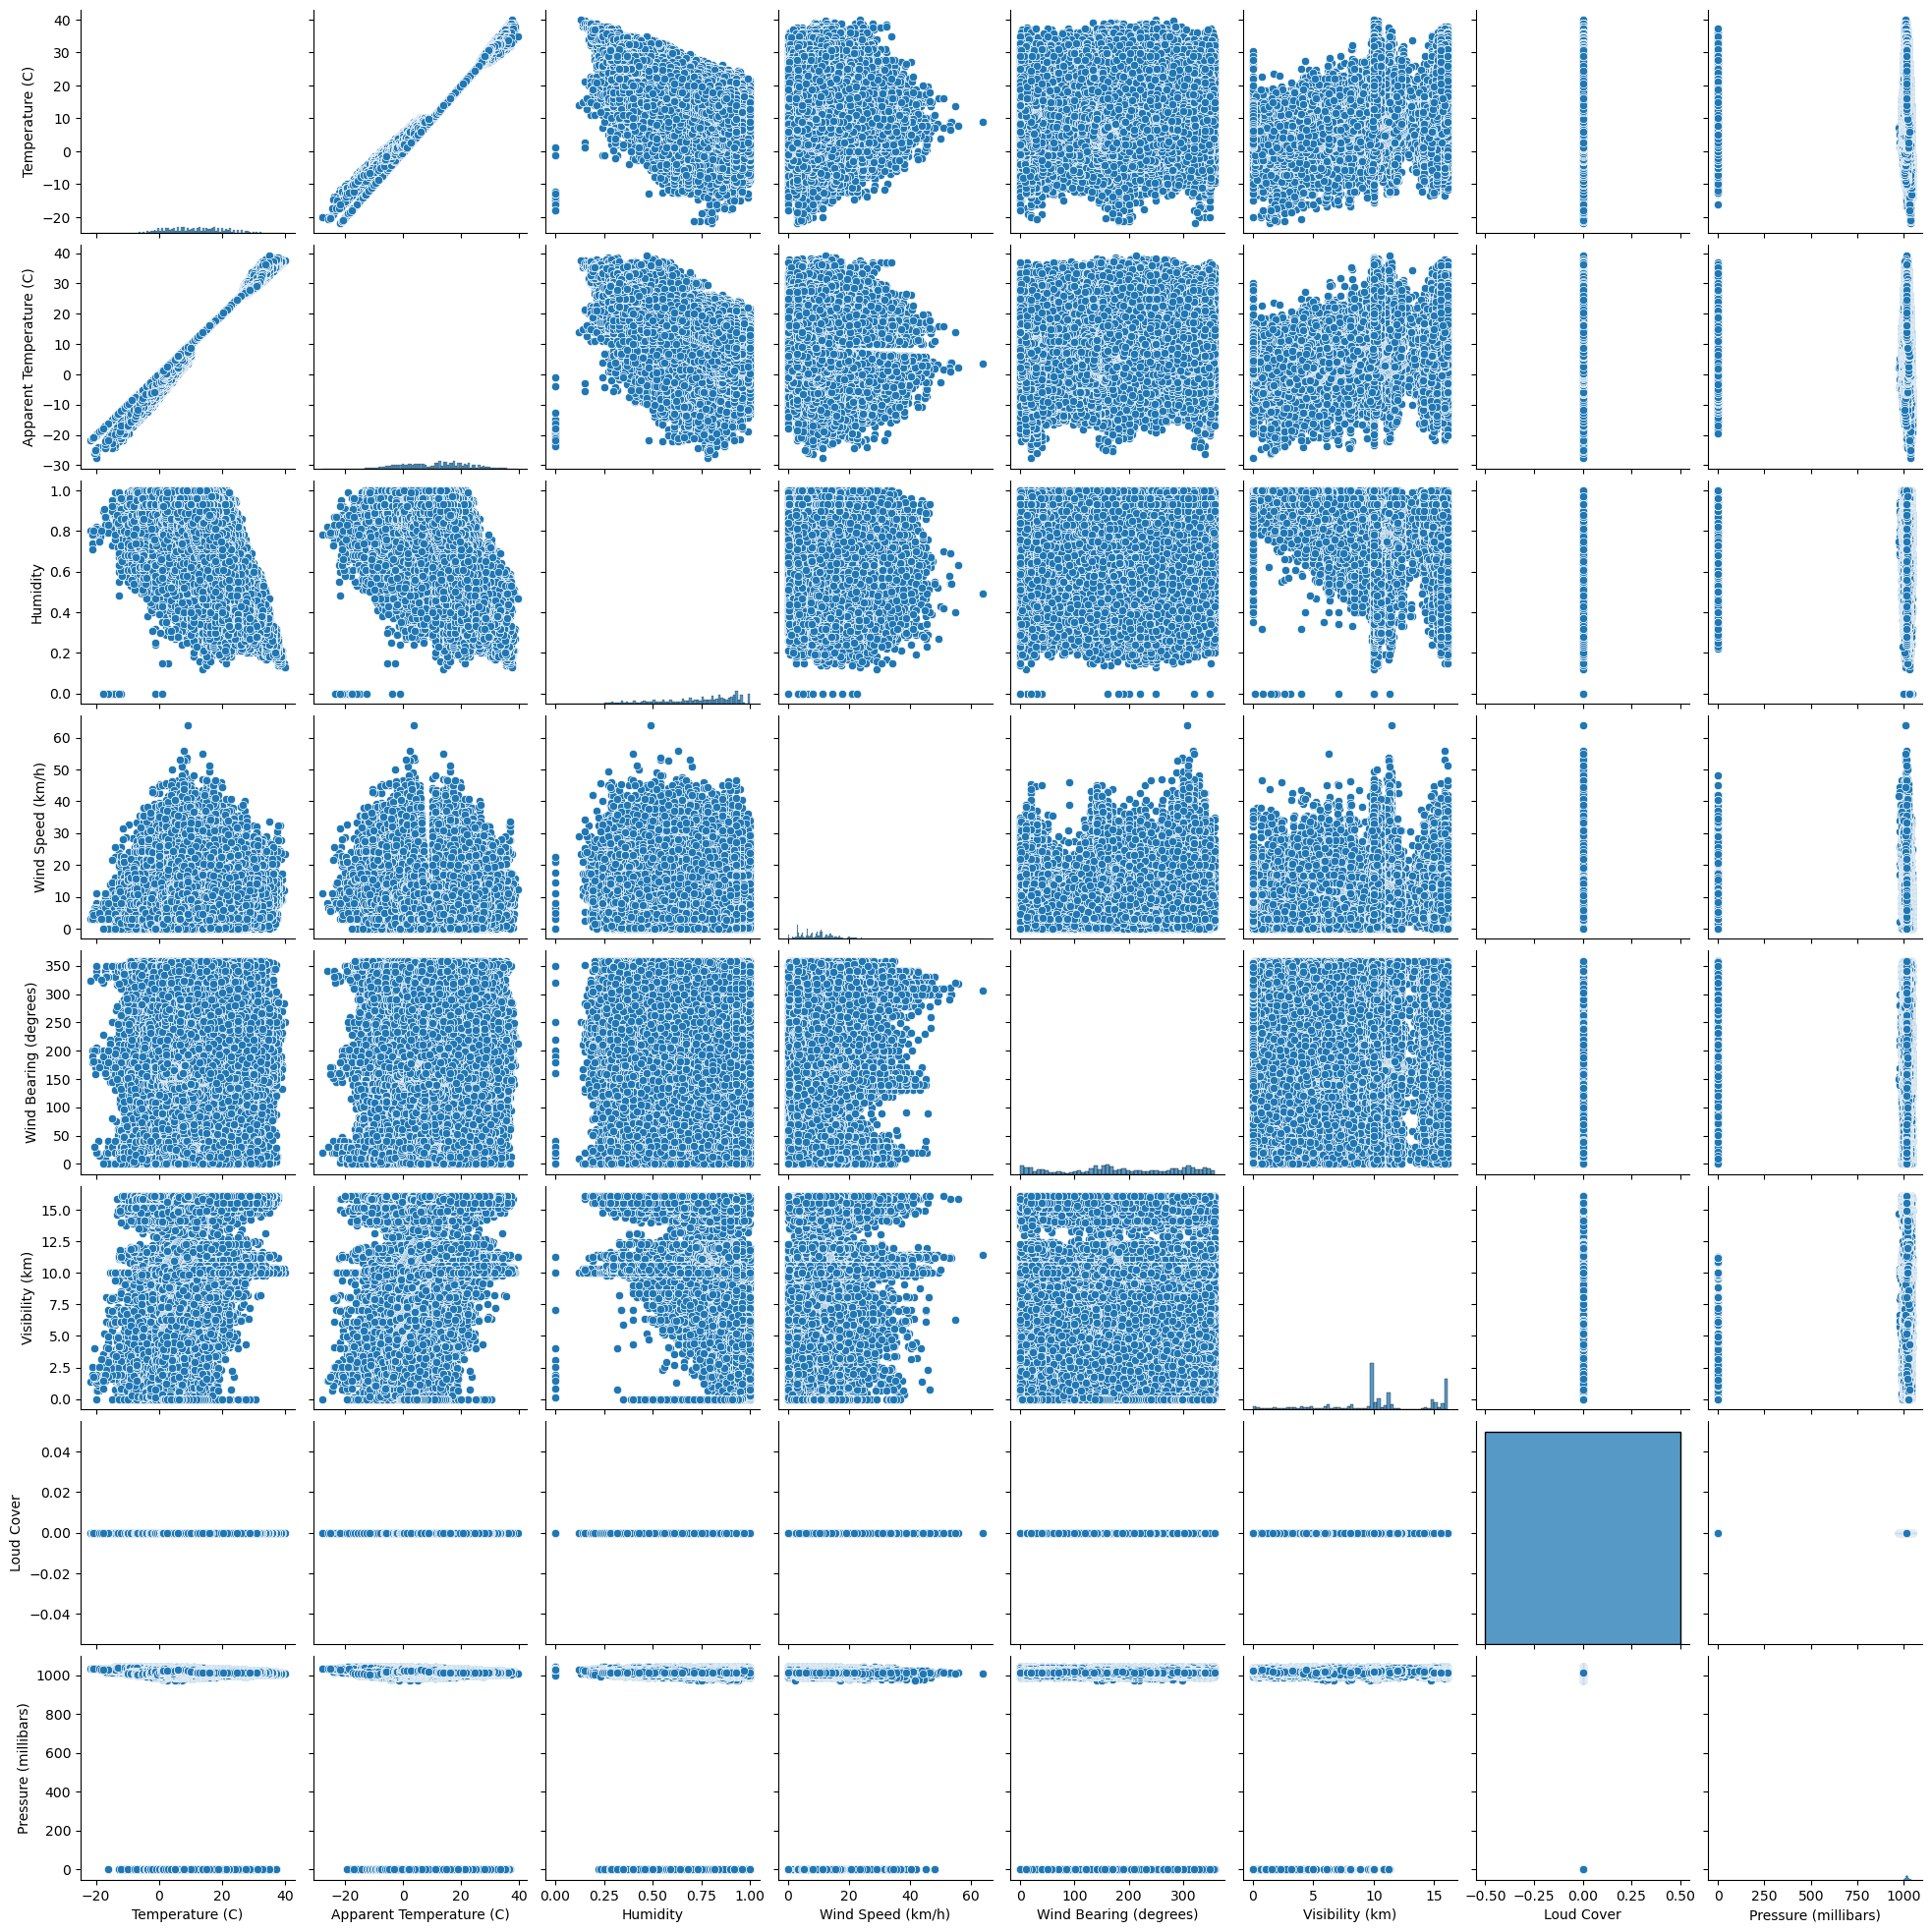

In [5]:
# Construcitng a pairlot
sns.pairplot(df)

A pair plot, also known as a scatterplot matrix.
It displays scatterplots for each combination of two variables in a dataset, showing how they relate to each other.
From the graph above, it is evident that the Apparaent tempareture and temperature are highly correlated

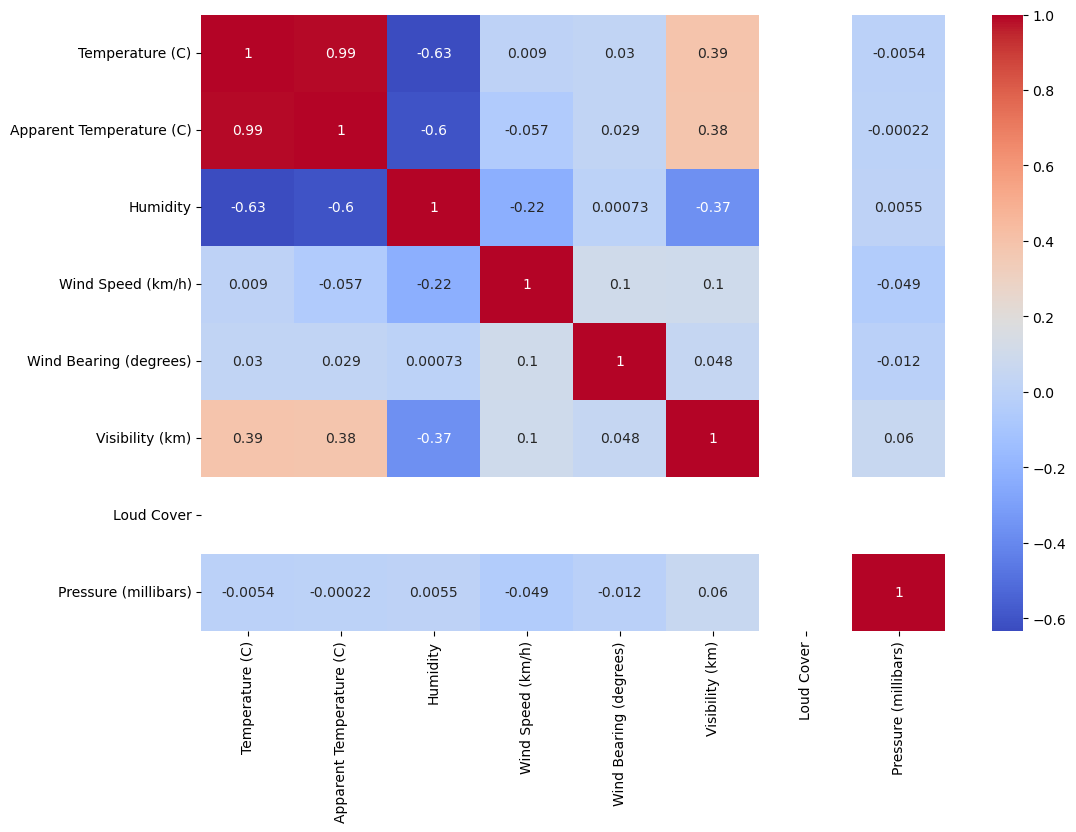

In [6]:
#Correlational analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Similar results of correlation can be interpreted from the above heatmap.

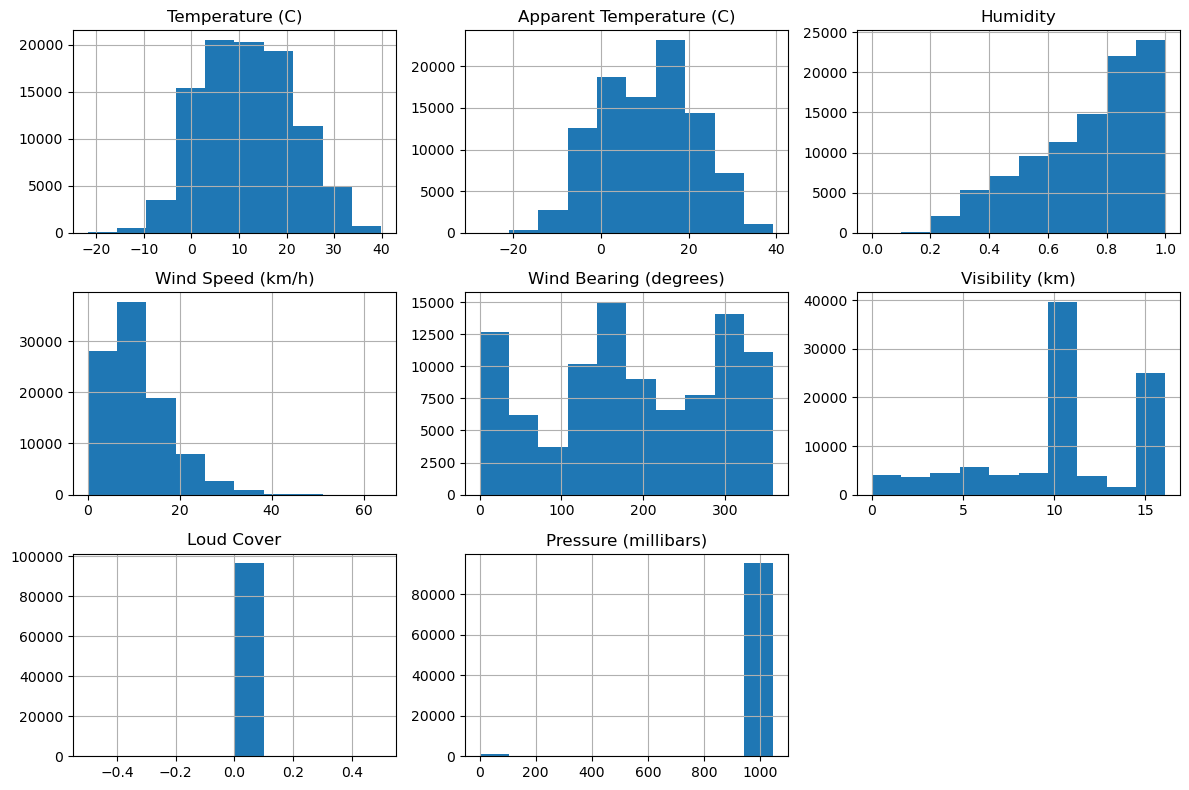

In [7]:
#Histogram
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

The historgrams clearly show that our data is not normal

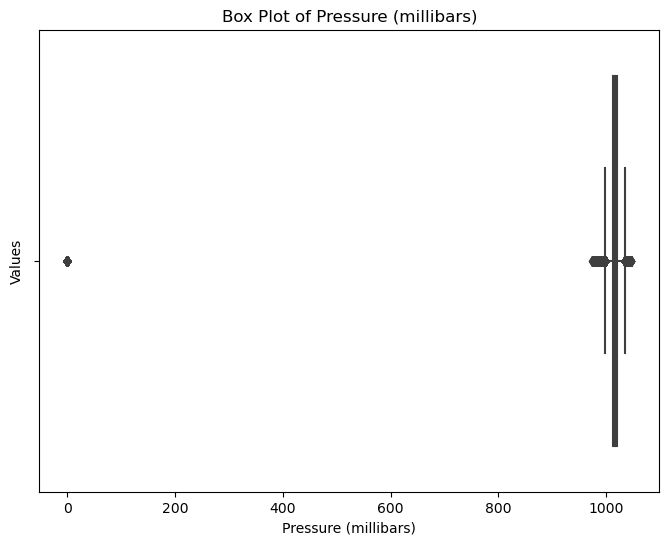

In [8]:
 #Box plot of Pressure (millibars)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pressure (millibars)')
plt.title('Box Plot of Pressure (millibars)')
plt.xlabel('Pressure (millibars)')
plt.ylabel('Values')
plt.show()

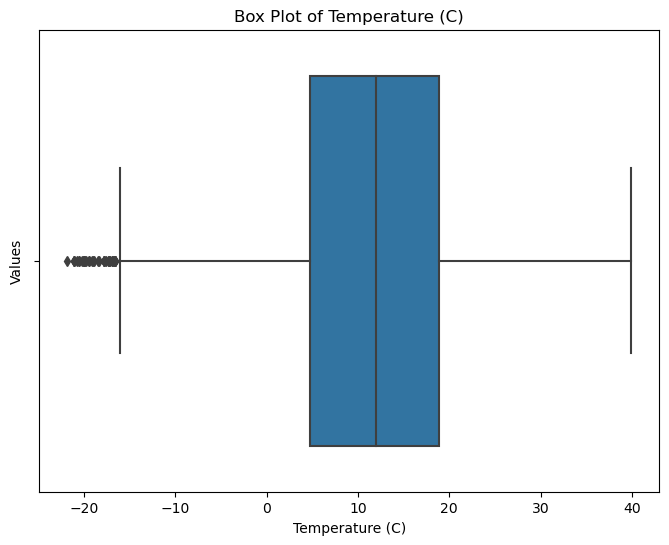

In [9]:
#Box plot of Temperature (C)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Temperature (C)')
plt.title('Box Plot of Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Values')
plt.show()

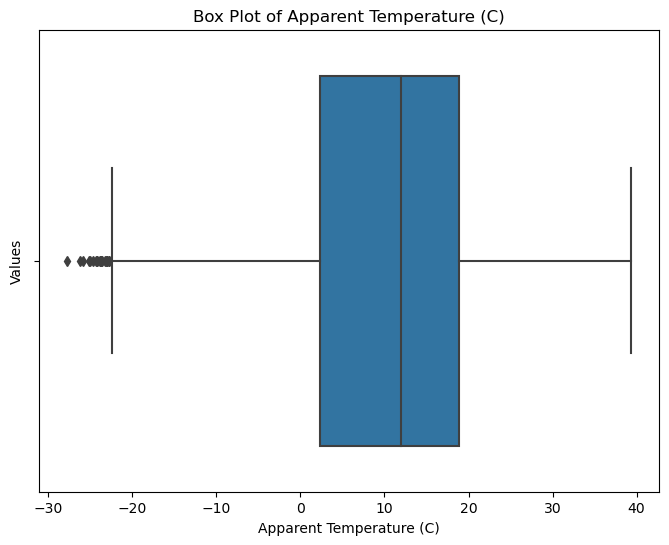

In [10]:
#Box plot of Apparent Temperature (C)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Apparent Temperature (C)')
plt.title('Box Plot of Apparent Temperature (C)')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel('Values')
plt.show()

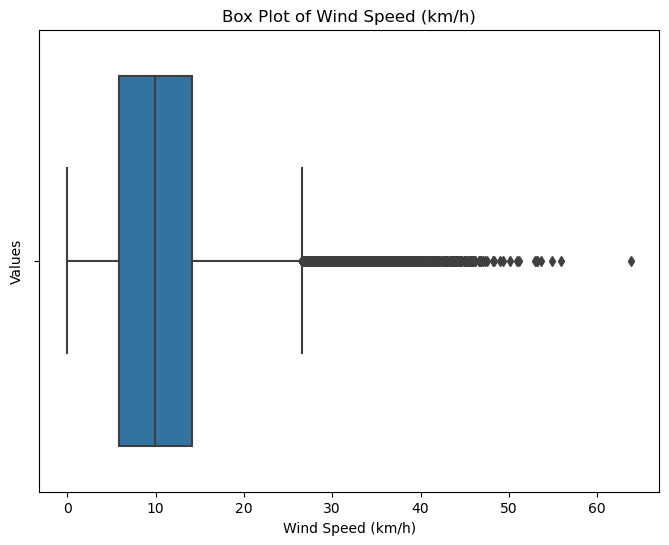

In [11]:
#Box plot of Wind Speed (km/h)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Wind Speed (km/h)')
plt.title('Box Plot of Wind Speed (km/h)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Values')
plt.show()

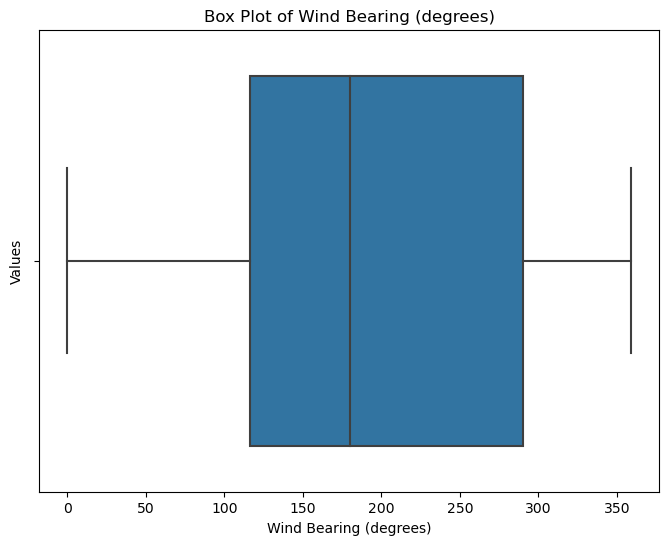

In [12]:
#Box plot of Wind Bearing (degrees)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Wind Bearing (degrees)')
plt.title('Box Plot of Wind Bearing (degrees)')
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Values')
plt.show()

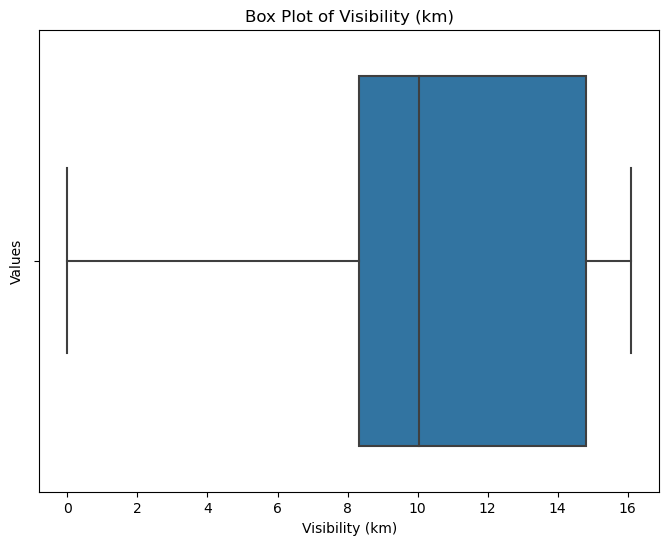

In [13]:
#Box plot of Visibility (km)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Visibility (km)')
plt.title('Box Plot of Visibility (km)')
plt.xlabel('Visibility (km)')
plt.ylabel('Values')
plt.show()


The above boxplots show the presence of outliers in

Pressure (millibars)

Temperature (C)

Apparent Temperature (C)

Wind Speed (km/h)

The descriptive statisicts in 'b' have already shared a lot about the data.
We also know about the shape of the data set and number of null values.We also know that our data is not normal
We will now undertand the skewness and kurtosis of the dataset. We will also show the unique values of each of the categorical variable.

Skewness measures the asymmetry of the distribution of data points around the mean. It indicates whether the data is skewed to the left (negatively skewed) or to the right (positively skewed) relative to the normal distribution.

Kurtosis measures the "tailedness" or the degree of peakedness of a distribution. It helps in understanding the thickness of the tails compared to a normal distribution.

In [14]:
skewness_values = df.skew()

print("Skewness values for each column:")
print(skewness_values)

# Assuming 'included_data' is your DataFrame
kurtosis_values = df.kurtosis()

print("Kurtosis values for each column:")
print(kurtosis_values)

Skewness values for each column:
Temperature (C)             0.094127
Apparent Temperature (C)   -0.057302
Humidity                   -0.715880
Wind Speed (km/h)           1.113493
Wind Bearing (degrees)     -0.154643
Visibility (km)            -0.498712
Loud Cover                  0.000000
Pressure (millibars)       -8.422506
dtype: float64
Kurtosis values for each column:
Temperature (C)             -0.566791
Apparent Temperature (C)    -0.706844
Humidity                    -0.462170
Wind Speed (km/h)            1.769284
Wind Bearing (degrees)      -1.131534
Visibility (km)             -0.260339
Loud Cover                   0.000000
Pressure (millibars)        69.268758
dtype: float64


C:\Users\verma\AppData\Local\Temp\ipykernel_13144\776888476.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness_values = df.skew()
C:\Users\verma\AppData\Local\Temp\ipykernel_13144\776888476.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis_values = df.kurtosis()


### Skewness
Temperature (C) (0.091797): The positive skewness value suggests a slight right-skewed distribution, meaning there might be a few higher temperature values that pull the distribution slightly to the right.

Apparent Temperature (C) (-0.059040): The negative skewness value indicates a very slight left-skewed distribution. This suggests that there might be a few lower apparent temperature values, but the distribution is almost symmetric.

Humidity (-0.715026): The negative skewness value suggests a left-skewed distribution, indicating that the majority of humidity values are on the higher side, with a few lower values.

Wind Speed (km/h) (1.115995): The positive skewness value indicates a right-skewed distribution. This suggests that there might be some higher wind speed values that pull the distribution to the right.

Wind Bearing (degrees) (-0.154793): The negative skewness value indicates a slightly left-skewed distribution. This suggests that the majority of wind bearing values might be on the higher side, with a few lower values.

Visibility (km) (-0.492114): The negative skewness value suggests a left-skewed distribution. This indicates that the majority of visibility values might be on the higher side, with a few lower values.

Loud Cover (0.000000): A skewness value of 0 indicates a symmetric distribution. However, as mentioned before, if there is no variability in the data (standard deviation is likely 0), this result is expected.

Pressure (millibars) (-8.399381): The highly negative skewness value suggests a significantly left-skewed distribution. This indicates that the majority of pressure values are on the lower side, with a few extremely high values that pull the distribution strongly to the left.

### Kurtosis
Temperature (C) (-0.574322): The negative kurtosis value suggests that the distribution of temperature is relatively flatter and has lighter tails compared to a normal distribution. This indicates that extreme values are less likely.

Apparent Temperature (C) (-0.713171): Similar to the temperature column, the negative kurtosis value indicates that the distribution of apparent temperature is flatter and less peaked than a normal distribution.

Humidity (-0.466881): Again, the negative kurtosis suggests that the distribution of humidity is platykurtic, meaning it has lighter tails and a flatter peak. This indicates that extreme humidity values are less likely.

Wind Speed (km/h) (1.772303): The positive kurtosis value implies that the distribution of wind speed has heavier tails and a sharper peak than a normal distribution. This suggests that there might be occasional extreme wind speed values.

Wind Bearing (degrees) (-1.131430): The negative kurtosis indicates that the distribution of wind bearing has lighter tails and a flatter peak. This suggests that extreme wind bearing values are less likely.

Visibility (km) (-0.265046): The negative kurtosis value indicates that the distribution of visibility is platykurtic, similar to the other variables with negative kurtosis. Extreme visibility values are less likely.

Loud Cover (0.000000): A kurtosis value of 0 means the distribution is mesokurtic, which is a normal distribution. However, since loud cover seems to have no variability (standard deviation is likely 0), this result is expected.

Pressure (millibars) (68.875629): The positive kurtosis value suggests that the distribution of pressure has heavier tails and a sharper peak compared to a normal distribution. This indicates that there might be occasional extreme pressure values.

In [15]:
summary_counts = df['Summary'].value_counts()
print("Distinct values of Summary and their counts are: \n",summary_counts)

precip_counts = df['Precip Type'].value_counts()
print("\n Distinct values of Precip Type and their counts are: \n",precip_counts)

dailysummary_counts = df['Daily Summary'].value_counts()
print("\n Distinct values of Daily Summary and their counts are: \n",dailysummary_counts)


Distinct values of Summary and their counts are: 
 Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Wind

In [16]:
print ("Unique values are:\n",df.nunique())

Unique values are:
 Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


##Additional step to gain more insights on the data

In [17]:
!pip install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable


## Data Pre-processing and cleaning

In [19]:
#missing values
missing_values = df.isnull().sum()
print("Missing values are", missing_values)
df.dtypes

Missing values are Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [20]:
missing_out= ((((df['Precip Type'].isnull().sum())/len(df)))*100).round(2)
t_null= df['Precip Type'].isnull().sum()
t_length=len(df['Precip Type'])
print('Total data froma values:', t_length)
print('Null Count Values: ',t_null)
print('percentage ',missing_out,'%')
df.shape

Total data froma values: 96453
Null Count Values:  517
percentage  0.54 %


(96453, 12)

Since the percetange of missing values is very less. Therefore, it is viable to drop the null values.

In [21]:
#dropping null values
df.dropna(inplace= True)
df.shape

(95936, 12)

In [22]:
#Dropping the column 'Loud Cover' as it has all 0 values and have no impact on the prediciton of 'Humidity' as per above analysis.
#Dropping 'Apparennt Temperature' column as it is the perceived temperature and has high correlation with 'Temperature' which is the actual recorded temperature
#Dropping 'Formatted Date' columnn also as date has no impact on the existence of humidity
#Dropping 'Humidity' as it is our target variable
columns_to_drop = ['Apparent Temperature (C)', 'Loud Cover', 'Formatted Date', 'Humidity']

# Drop the specified columns
df_dropped_null = df.drop(columns=columns_to_drop)

# Display the modified DataFrame
print("\n DataFrame after dropping columns:")
print(df_dropped_null.shape)


 DataFrame after dropping columns:
(95936, 8)


In [23]:
print ("Unique values are:\n",df_dropped_null.nunique())

Unique values are:
 Summary                     27
Precip Type                  2
Temperature (C)           7573
Wind Speed (km/h)         2484
Wind Bearing (degrees)     360
Visibility (km)            949
Pressure (millibars)      4971
Daily Summary              214
dtype: int64


### Encoding of categorical variables

In [24]:
# Label encoding
label_encoder = LabelEncoder()
df_dropped_null['Summary_encoded'] = label_encoder.fit_transform(df_dropped_null['Summary'])
df_dropped_null['precip_encoded'] = label_encoder.fit_transform(df_dropped_null['Precip Type'])
df_dropped_null['daily_summary_encoded'] = label_encoder.fit_transform(df_dropped_null['Daily Summary'])
df_dropped_null.head()

,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Summary_encoded,precip_encoded,daily_summary_encoded
0,Partly Cloudy,rain,9.472222,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,19,0,197
1,Partly Cloudy,rain,9.355556,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,19,0,197
2,Mostly Cloudy,rain,9.377778,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,17,0,197
3,Partly Cloudy,rain,8.288889,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,19,0,197
4,Mostly Cloudy,rain,8.755556,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,17,0,197


In [25]:
df_dropped_null.shape

(95936, 11)

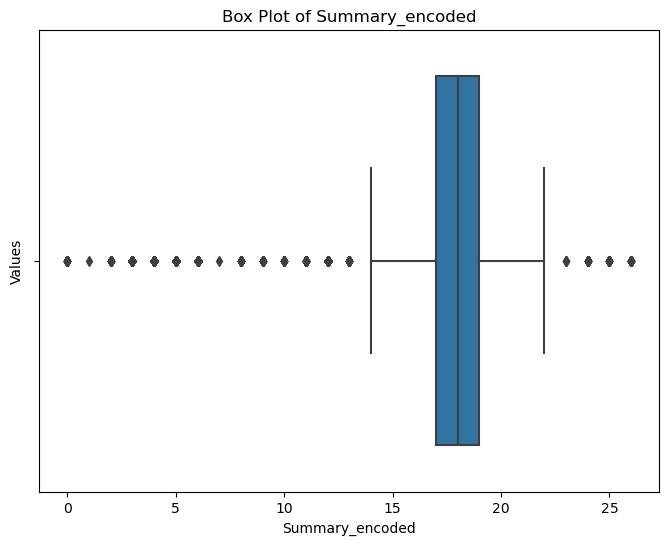

In [26]:
#Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_dropped_null, x='Summary_encoded')
plt.title('Box Plot of Summary_encoded')
plt.xlabel('Summary_encoded')
plt.ylabel('Values')
plt.show()

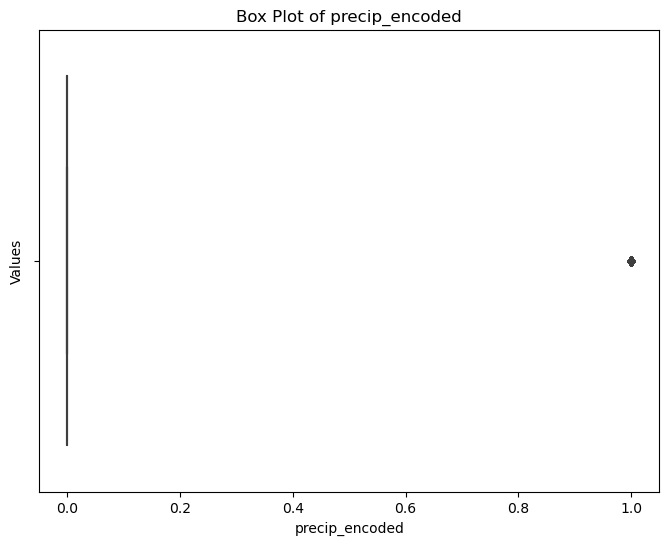

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_dropped_null, x='precip_encoded')
plt.title('Box Plot of precip_encoded')
plt.xlabel('precip_encoded')
plt.ylabel('Values')
plt.show()

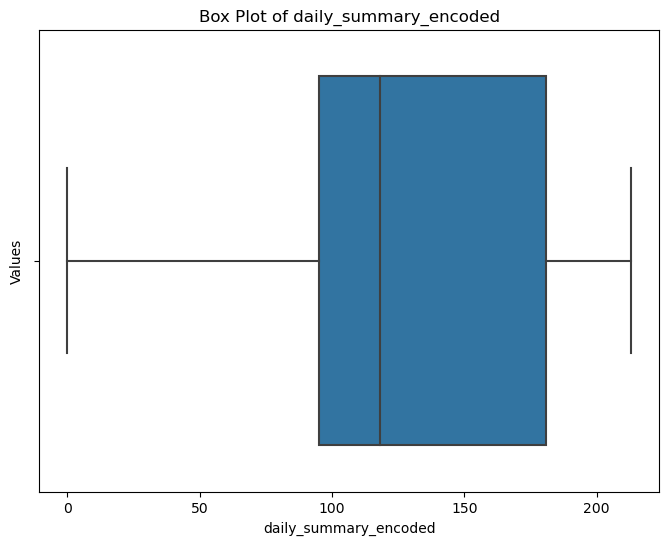

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_dropped_null, x='daily_summary_encoded')
plt.title('Box Plot of daily_summary_encoded')
plt.xlabel('daily_summary_encoded')
plt.ylabel('Values')
plt.show()

From the above Boxplots, it is evident that the outliers are present in Summary and Precip Type

The outliers and Skewness will be addressed in the next part during the process of normalization and scaling.

### Scaling
Minmax scaler is the most common scaling technique which we will apply on the data without outliers and Robust scaling is used on data with ourliers.

Therefore - Minmax scaling is used for Wind Bearing (degrees), Visibility (km) and Daily Summary


Robust is used in Temperature (C), Wind Speed (km/h), Pressure, Precip Type and Summary


In [29]:

column_to_scale_wind = df_dropped_null['Wind Bearing (degrees)']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_windbearing = scaler.fit_transform(column_to_scale_wind.values.reshape(-1, 1))

# Create a new DataFrame with the scaled values
df_scaled_windbearing= pd.DataFrame(scaled_windbearing, columns=['Scaled Wind Bearing (degrees)'])

# Print the scaled DataFrame
print(df_scaled_windbearing)

       Scaled Wind Bearing (degrees)
0                           0.699164
1                           0.721448
2                           0.568245
3                           0.749304
4                           0.721448
...                              ...
95931                       0.086351
95932                       0.055710
95933                       0.083565
95934                       0.055710
95935                       0.108635

[95936 rows x 1 columns]


In [30]:
column_to_scale_vis = df_dropped_null['Visibility (km)']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(column_to_scale_vis.values.reshape(-1, 1))

# Create a new DataFrame with the scaled values
df_scaled_visibility= pd.DataFrame(scaled_data, columns=['Scaled Visibility (km)'])

# Print the scaled DataFrame
print(df_scaled_visibility)

       Scaled Visibility (km)
0                       0.983
1                       0.983
2                       0.929
3                       0.983
4                       0.983
...                       ...
95931                   1.000
95932                   0.966
95933                   1.000
95934                   1.000
95935                   0.964

[95936 rows x 1 columns]


In [31]:
temperature_column = df_dropped_null['Temperature (C)']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(temperature_column.values.reshape(-1, 1))

# Create a new DataFrame with the scaled values
df_scaled_temp = pd.DataFrame(scaled_data, columns=['Scaled Temperature (C)'])

# Print the scaled DataFrame
print(df_scaled_temp)


       Scaled Temperature (C)
0                   -0.179850
1                   -0.188043
2                   -0.186482
3                   -0.262947
4                   -0.230177
...                       ...
95931                0.981957
95932                0.881303
95933                0.702624
95934                0.666342
95935                0.590266

[95936 rows x 1 columns]


In [32]:
pressure_column =df_dropped_null['Pressure (millibars)']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(pressure_column.values.reshape(-1, 1))

# Create a new DataFrame with the scaled values
df_scaled_pressure = pd.DataFrame(scaled_data, columns=['Scaled Pressure (millibars)'])

# Print the scaled DataFrame
print(df_scaled_pressure)

       Scaled Pressure (millibars)
0                        -0.140830
1                        -0.086245
2                        -0.052402
3                        -0.001092
4                         0.009825
...                            ...
95931                    -0.224891
95932                    -0.137555
95933                    -0.082969
95934                    -0.051310
95935                    -0.028384

[95936 rows x 1 columns]


In [33]:
wind_column = df_dropped_null['Wind Speed (km/h)']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(wind_column.values.reshape(-1, 1))

# Create a new DataFrame with the scaled values
df_scaled_windspeed = pd.DataFrame(scaled_data, columns=['Scaled Wind Speed (km/h)'])

# Print the scaled DataFrame
print(df_scaled_windspeed)

       Scaled Wind Speed (km/h)
0                      0.501931
1                      0.519305
2                     -0.720077
3                      0.500000
4                      0.133205
...                         ...
95931                  0.127413
95932                  0.019305
95933                 -0.113900
95934                  0.071429
95935                 -0.486486

[95936 rows x 1 columns]


In [34]:
summary_encoded_column = df_dropped_null['Summary_encoded']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(summary_encoded_column.values.reshape(-1, 1))

# Create a new DataFrame with the scaled values
df_scaled_summary_encoded = pd.DataFrame(scaled_data, columns=['Scaled_summary_encoded'])

# Print the scaled DataFrame
print(df_scaled_summary_encoded)

       Scaled_summary_encoded
0                         0.5
1                         0.5
2                        -0.5
3                         0.5
4                        -0.5
...                       ...
95931                     0.5
95932                     0.5
95933                     0.5
95934                     0.5
95935                     0.5

[95936 rows x 1 columns]


In [35]:
precip_encoded_column = df_dropped_null['precip_encoded']

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(precip_encoded_column.values.reshape(-1, 1))

# Create a new DataFrame with the scaled values
df_scaled_precip_encoded = pd.DataFrame(scaled_data, columns=['Scaled_precip_encoded'])

# Print the scaled DataFrame
print(df_scaled_precip_encoded)

       Scaled_precip_encoded
0                        0.0
1                        0.0
2                        0.0
3                        0.0
4                        0.0
...                      ...
95931                    0.0
95932                    0.0
95933                    0.0
95934                    0.0
95935                    0.0

[95936 rows x 1 columns]


In [36]:
column_to_scale_DS = df_dropped_null['daily_summary_encoded']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(column_to_scale_DS.values.reshape(-1, 1))

# Create a new DataFrame with the scaled values
df_scaled_daily_summary_encoded= pd.DataFrame(scaled_data, columns=['Scaled_daily_summary_encoded'])

# Print the scaled DataFrame
print(df_scaled_daily_summary_encoded)

       Scaled_daily_summary_encoded
0                          0.924883
1                          0.924883
2                          0.924883
3                          0.924883
4                          0.924883
...                             ...
95931                      0.798122
95932                      0.798122
95933                      0.798122
95934                      0.798122
95935                      0.798122

[95936 rows x 1 columns]


In [37]:
#making a final data set to process


dataframes = [df_scaled_windbearing, df_scaled_visibility, df_scaled_temp, df_scaled_pressure, df_scaled_windspeed,df_scaled_summary_encoded,df_scaled_precip_encoded,df_scaled_daily_summary_encoded]

# Combine DataFrames horizontally
df_toprocess = pd.concat(dataframes,axis=1)
print("Shape of the final labelled and scaled dataset is:  ",df_toprocess.shape)
df_toprocess.head()


Shape of the final labelled and scaled dataset is:   (95936, 8)


,Scaled Wind Bearing (degrees),Scaled Visibility (km),Scaled Temperature (C),Scaled Pressure (millibars),Scaled Wind Speed (km/h),Scaled_summary_encoded,Scaled_precip_encoded,Scaled_daily_summary_encoded
0,0.699164,0.983,-0.179850,-0.140830,0.501931,0.5,0.0,0.924883
1,0.721448,0.983,-0.188043,-0.086245,0.519305,0.5,0.0,0.924883
2,0.568245,0.929,-0.186482,-0.052402,-0.720077,-0.5,0.0,0.924883
3,0.749304,0.983,-0.262947,-0.001092,0.500000,0.5,0.0,0.924883
4,0.721448,0.983,-0.230177,0.009825,0.133205,-0.5,0.0,0.924883


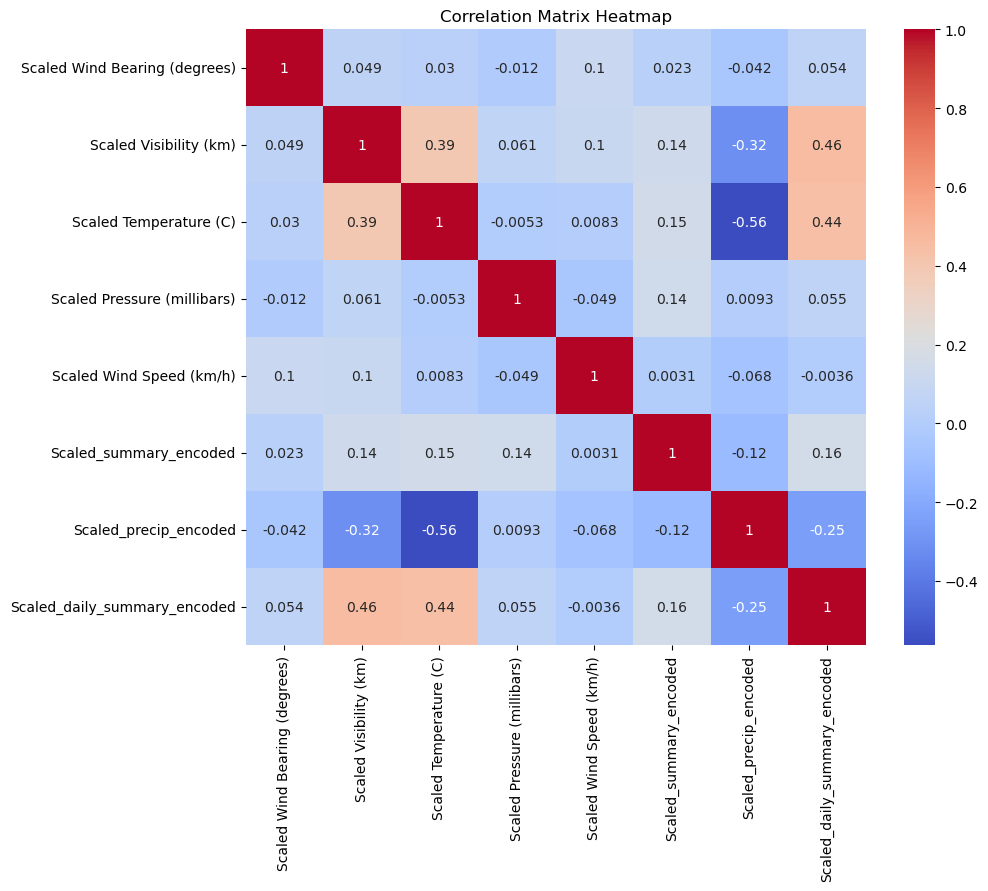

In [38]:
correlation_matrix = df_toprocess.corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

Since, the correlation between every pair of values is less tha 0.6, therefore, we are good to go with our further analysis

## Data Preparation

We have split the train:test::4:1
i.e. 80% is training data and 20% is test data

In [39]:
selected_features=['Scaled Wind Bearing (degrees)',
'Scaled Visibility (km)',
'Scaled Temperature (C)',
'Scaled Pressure (millibars)',
'Scaled Wind Speed (km/h)',
'Scaled_summary_encoded',
'Scaled_precip_encoded',
'Scaled_daily_summary_encoded',
]
X = df_toprocess[selected_features]
Y = df['Humidity'] #target variable


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (76748, 8)
X_test shape: (19188, 8)
y_train shape: (76748,)
y_test shape: (19188,)


## Model Building

In [41]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest Regression", RandomForestRegressor(random_state=42)),
    ("Support Vector Regression", SVR())
]

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
models_comparison_train={}
for name, model in models:
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    mse = mean_squared_error(y_train, y_train_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_train, y_train_pred)

    print(f"{name} - Training MSE: {mse:.2f}")
    print(f"{name} - Training RMSE: {rmse:.2f}")
    print(f"{name} - Training R2: {r2:.2f}")
    print("-" * 30)
    # Store data in models_comparision dictionary
    models_comparison_train[name] = [mse, rmse, r2]

Training Linear Regression...
Linear Regression - Training MSE: 0.02
Linear Regression - Training RMSE: 0.14
Linear Regression - Training R2: 0.50
------------------------------
Training Random Forest Regression...
Random Forest Regression - Training MSE: 0.00
Random Forest Regression - Training RMSE: 0.04
Random Forest Regression - Training R2: 0.97
------------------------------
Training Support Vector Regression...
Support Vector Regression - Training MSE: 0.01
Support Vector Regression - Training RMSE: 0.12
Support Vector Regression - Training R2: 0.61
------------------------------


In [43]:
models_com_df = pd.DataFrame(models_comparison_train).T
models_com_df.columns = [
    "MSE",
    "RMSE",
    "R2"
]
models_com_df = models_com_df.sort_values(by = "RMSE", ascending = False)
# Format the value to 2 decimal places
models_com_df.style.format("{:.2}").background_gradient(cmap="Blues")

,MSE,RMSE,R2
Linear Regression,0.019,0.14,0.5
Support Vector Regression,0.015,0.12,0.61
Random Forest Regression,0.0013,0.036,0.97


The trainining accuracy scores for regression models are MSE, RMSE and R2 as printed above.


The Linear Regression model has an MSE of 0.02, which means the average squared difference between the predicted values and the actual values is 0.02. The RMSE is 0.14, indicating the square root of the MSE, which represents the average difference between predicted and actual values. The R2 score is 0.50, which means that approximately 50% of the variance in the target variable is explained by the model.


 The Random Forest Regression model has very low MSE (0.00), indicating that it's capturing the training data very well. The RMSE is also low (0.04), suggesting that the model's predictions are quite close to the actual values. The R2 score is high (0.97), indicating that around 97% of the variance in the target variable is explained by the model.


 The Support Vector Regression model has a relatively low MSE (0.01), implying that the model's predictions are fairly accurate. The RMSE is 0.12, indicating a moderate average difference between predicted and actual values. The R2 score is 0.61, suggesting that around 61% of the variance in the target variable is explained by the model.


 Overall, the Random Forest Regression model appears to be performing very well on the training data, with exceptionally low errors and a high R2 score. The Linear Regression and Support Vector Regression models also show reasonable performance, but they have higher errors and R2 scores compared to the Random Forest model.

## Performance Evaluation

Confusion matrix is used to evaluate classification models.
Therefore, the performance evaluation parameters for our models would be MSE, RMSE and R2

In [44]:
models_comparison_test={}
for name, model in models:
    print(f"Evaluating {name}...")
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    #mae = mean_absolute_error(y_test, y_pred)

    print(f"{name} - Test MSE: {mse:.2f}")
    print(f"{name} - Test RMSE: {rmse:.2f}")
    print(f"{name} - Test R2: {r2:.2f}")
    #print(f"{name} - Test MAE: {mae:.2f}")
    print("-" * 50)

    # Store data in models_comparision dictionary
    models_comparison_test[name] = [mse, rmse, r2]

Evaluating Linear Regression...
Linear Regression - Test MSE: 0.02
Linear Regression - Test RMSE: 0.14
Linear Regression - Test R2: 0.50
--------------------------------------------------
Evaluating Random Forest Regression...
Random Forest Regression - Test MSE: 0.00
Random Forest Regression - Test RMSE: 0.04
Random Forest Regression - Test R2: 0.96
--------------------------------------------------
Evaluating Support Vector Regression...
Support Vector Regression - Test MSE: 0.02
Support Vector Regression - Test RMSE: 0.13
Support Vector Regression - Test R2: 0.59
--------------------------------------------------


In [45]:
models_com_df = pd.DataFrame(models_comparison_test).T
models_com_df.columns = [
    "MSE",
    "RMSE",
    "R2"
]
models_com_df = models_com_df.sort_values(by = "RMSE", ascending = False)
# Format the value to 2 decimal places
models_com_df.style.format("{:.2}").background_gradient(cmap="Blues")

,MSE,RMSE,R2
Linear Regression,0.019,0.14,0.5
Support Vector Regression,0.016,0.13,0.59
Random Forest Regression,0.0015,0.039,0.96


The Linear Regression model's performance on the test data is consistent with the training results. The MSE of 0.02 indicates that the average squared difference between the predicted values and the actual values on the test data is 0.02. The RMSE is 0.14, suggesting that the model's predictions on the test data are, on average, around 0.14 units away from the actual values. The R2 score of 0.50 implies that approximately 50% of the variance in the target variable is explained by the model on the test data.


The Random Forest Regression model's performance on the test data is impressive. The very low MSE of 0.00 indicates that the model's predictions on the test data are extremely close to the actual values. The RMSE of 0.04 suggests that, on average, the predictions are only about 0.04 units away from the true values. The high R2 score of 0.96 indicates that around 96% of the variance in the target variable is explained by the model on the test data.


The Support Vector Regression model's performance on the test data is consistent with the training results. The MSE of 0.02 indicates that the model's predictions on the test data have an average squared difference of 0.02 from the actual values. The RMSE of 0.13 suggests that, on average, the predictions are about 0.13 units away from the true values. The R2 score of 0.59 indicates that approximately 59% of the variance in the target variable is explained by the model on the test data.


Overall, the Random Forest Regression model continues to perform exceptionally well on the test data, followed by the Support Vector Regression model. The Linear Regression model's performance is consistent between training and testing, but it's not as strong as the other two models in terms of prediction accuracy and variance explanation.

The below codes are written to plot scatter plot graphs between the true values and the predicted values.

Scatter Plot: The scatter plot is a type of data visualization that uses dots to represent the values obtained for two different variables. In this case, the scatter plot will have one dot for each data point in the test set.

True Values: The x-axis of the scatter plot represents the "True Values." These are the actual values of the target variable (in this case, the variable you're trying to predict) from the test dataset.

Predicted Values: The y-axis of the scatter plot represents the "Predicted Values." These are the values that   the regression model has predicted for the corresponding data points in the test dataset.

Diagonal Line Idealization: In an ideal scenario, where the predicted values match the true values perfectly, the scatter plot would form a diagonal line. This line is called the "Ideal Diagonal Line." Each point on this line would have the same x and y value, indicating that the predictions perfectly align with the actual values.

Model Performance Interpretation:The quality of the regression model's performance can be visually assessed by how closely the scatter plot points resemble the diagonal line. If the scatter plot points are scattered around the diagonal line and follow a pattern, it indicates that the model's predictions are fairly accurate.

Points Above the Line: If points are located above the diagonal line, it means the model tends to overestimate the true values.
Points Below the Line: If points are located below the diagonal line, it means the model tends to underestimate the true values.
Model Evaluation: The scatter plot helps you quickly identify areas where the model is making accurate predictions and areas where it's making errors. Deviations from the diagonal line suggest discrepancies between predicted and true values

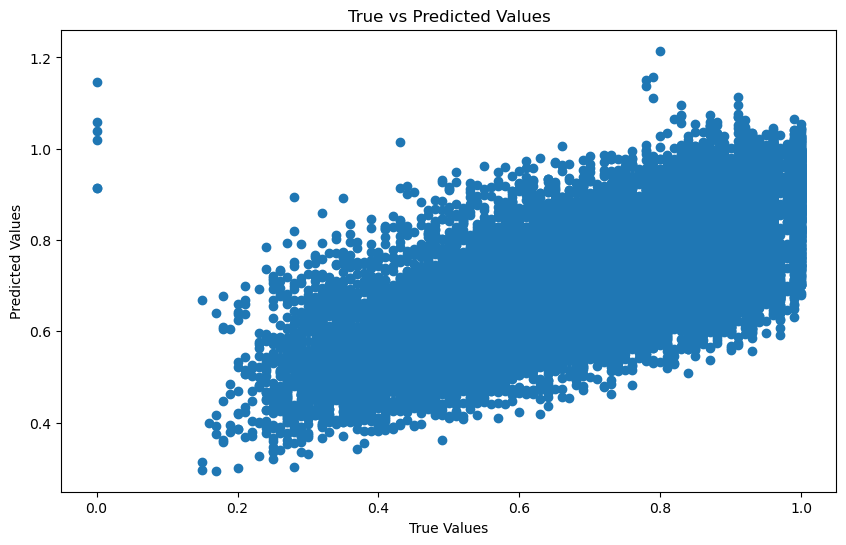

In [46]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# Create a LinearRegression model instance
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
pred = lin_reg.predict(X_test)

# Create a DataFrame to visualize the true and predicted values
df_pred = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred})

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_pred['True Values'], df_pred['Predicted Values'])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


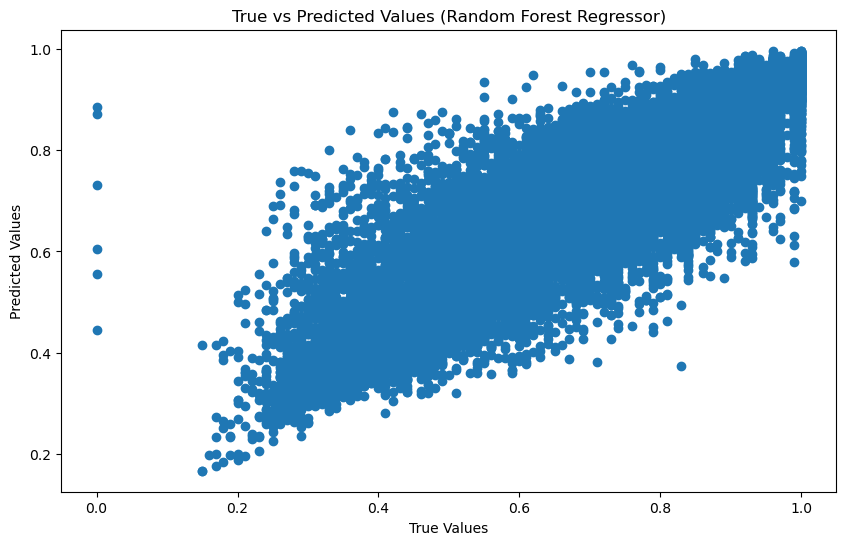

In [47]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create a RandomForestRegressor model instance
rf_regressor = RandomForestRegressor()

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
pred = rf_regressor.predict(X_test)

# Create a DataFrame to visualize the true and predicted values
df_pred = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred})

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_pred['True Values'], df_pred['Predicted Values'])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Random Forest Regressor)')
plt.show()


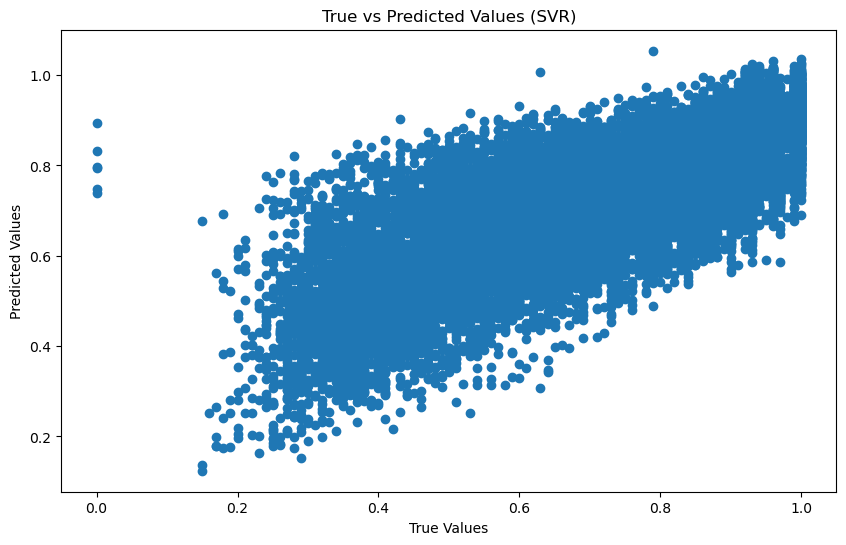

In [48]:
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create an SVR model instance
svr_regressor = SVR()

# Fit the model to the training data
svr_regressor.fit(X_train, y_train)

# Make predictions on the test data
pred = svr_regressor.predict(X_test)

# Create a DataFrame to visualize the true and predicted values
df_pred = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred})

# Create a scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_pred['True Values'], df_pred['Predicted Values'])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (SVR)')
plt.show()
